In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\HP\Desktop\Python Projects\boilerplate-page-view-time-series-visualizer\fcc-forum-pageviews.csv', )

In [3]:
# Learned about df.info which gives you the .head and .tail and also the .shape! 
#https://www.pluralsight.com/guides/cleaning-up-data-from-outliers
df.info

<bound method DataFrame.info of             date   value
0     2016-05-09    1201
1     2016-05-10    2329
2     2016-05-11    1716
3     2016-05-12   10539
4     2016-05-13    6933
...          ...     ...
1299  2019-11-29  171584
1300  2019-11-30  141161
1301  2019-12-01  142918
1302  2019-12-02  220144
1303  2019-12-03  158549

[1304 rows x 2 columns]>

In [4]:
df.describe()

,value
count,1.304000e+03
mean,6.722068e+04
std,5.933964e+04
min,1.201000e+03
25%,3.575775e+04
50%,5.719750e+04
75%,8.388300e+04
max,1.173655e+06


In [5]:
# Need to clean up the date. 1st attempt # With this, we would then have to further remove the NaN
df= df[(df['value'] >= (df['value'].quantile(0.025))) &
    (df['value'] <= (df['value'].quantile(0.975)))]

In [6]:
# Check the data. It looks like we have to remove/replace the NaN 

df.info

<bound method DataFrame.info of             date   value
10    2016-05-19   19736
17    2016-05-26   18060
18    2016-05-27   19997
19    2016-05-28   19044
20    2016-05-29   20325
...          ...     ...
1294  2019-11-24  138875
1299  2019-11-29  171584
1300  2019-11-30  141161
1301  2019-12-01  142918
1303  2019-12-03  158549

[1238 rows x 2 columns]>

In [7]:
df.head()

,date,value
10,2016-05-19,19736
17,2016-05-26,18060
18,2016-05-27,19997
19,2016-05-28,19044
20,2016-05-29,20325


In [8]:
df.describe()

,value
count,1238.000000
mean,63060.147819
std,31674.626598
min,18060.000000
25%,37244.250000
50%,57197.500000
75%,81646.500000
max,177588.000000


In [9]:
df.columns


Index(['date', 'value'], dtype='object')

In [10]:
df.dtypes

date     object
value     int64
dtype: object

In [11]:
# Learned about IQR
# https://stackoverflow.com/questions/35827863/remove-outliers-in-pandas-dataframe-using-percentiles
# Further explaination of Interquartile Range (IQR): https://www.pluralsight.com/guides/cleaning-up-data-from-outliers

#Q1 = df.quantile(0.25)
#Q3 = df.quantile(0.75)
#IQR = Q3 - Q1

#df_clean = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [12]:
# Need to turn 'date' into a column, if we set index_col=1
#df= df.reset_index()

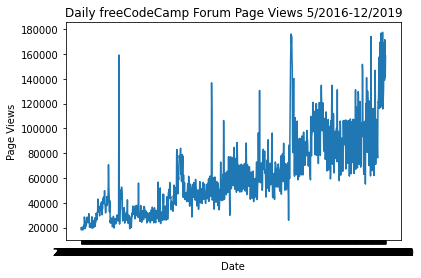

In [13]:
# Neet to plot a line plot
#https://realpython.com/pandas-plot-python/
#https://stackoverflow.com/questions/21487329/add-x-and-y-labels-to-a-pandas-plot

x = df['date']
y = df['value']

line_plot = sns.lineplot(data = df, x = 'date', y = 'value').set(title='Daily freeCodeCamp Forum Page Views 5/2016-12/2019', xlabel='Date', ylabel='Page Views')



#line_plot.set_xlabel('Date')
#line_plot.set_ylabel('Page View')



In [14]:
# Create a columns of months --- need to split / groupby data by month 

# Clean up the data: make sure it is ready to be split



In [15]:
df.head()

,date,value
10,2016-05-19,19736
17,2016-05-26,18060
18,2016-05-27,19997
19,2016-05-28,19044
20,2016-05-29,20325


In [16]:
# Need to convert to datetime, currently 'date' is an object
#https://stackoverflow.com/questions/24082784/pandas-dataframe-groupby-datetime-month

df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')


# not sure why, but df['date'] is NOT permanently changed
# Had to read https://realpython.com/pandas-settingwithcopywarning/ to learn about 'views' versus 'copy'
#https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas

<ipython-input-16-72e08c2e3de0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')


In [17]:
df.dtypes

date     datetime64[ns]
value             int64
dtype: object

In [18]:
# Let's create columns with month and year value using dt.month/dt.year
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

<ipython-input-18-ae0bed5cb296>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['date'].dt.month
<ipython-input-18-ae0bed5cb296>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['date'].dt.year


In [19]:
df.head()

,date,value,month,year
10,2016-05-19,19736,5,2016
17,2016-05-26,18060,5,2016
18,2016-05-27,19997,5,2016
19,2016-05-28,19044,5,2016
20,2016-05-29,20325,5,2016


In [20]:
df.dtypes

date     datetime64[ns]
value             int64
month             int64
year              int64
dtype: object

In [21]:
df.info

<bound method DataFrame.info of            date   value  month  year
10   2016-05-19   19736      5  2016
17   2016-05-26   18060      5  2016
18   2016-05-27   19997      5  2016
19   2016-05-28   19044      5  2016
20   2016-05-29   20325      5  2016
...         ...     ...    ...   ...
1294 2019-11-24  138875     11  2019
1299 2019-11-29  171584     11  2019
1300 2019-11-30  141161     11  2019
1301 2019-12-01  142918     12  2019
1303 2019-12-03  158549     12  2019

[1238 rows x 4 columns]>

In [22]:
# Count the total of NaN in our dataset using .isna

df.isna().sum()

date     0
value    0
month    0
year     0
dtype: int64

In [23]:
# Remove the NaN rows using .dropna()
df = df.dropna()

In [24]:
df.isna().sum()

date     0
value    0
month    0
year     0
dtype: int64

In [25]:
# Convert 'value', 'month', 'year' into int 
df[['value', 'month', 'year']] = df[['value', 'month', 'year']].astype(int)

In [26]:
df.dtypes

date     datetime64[ns]
value             int32
month             int32
year              int32
dtype: object

In [27]:
df.info

<bound method DataFrame.info of            date   value  month  year
10   2016-05-19   19736      5  2016
17   2016-05-26   18060      5  2016
18   2016-05-27   19997      5  2016
19   2016-05-28   19044      5  2016
20   2016-05-29   20325      5  2016
...         ...     ...    ...   ...
1294 2019-11-24  138875     11  2019
1299 2019-11-29  171584     11  2019
1300 2019-11-30  141161     11  2019
1301 2019-12-01  142918     12  2019
1303 2019-12-03  158549     12  2019

[1238 rows x 4 columns]>

In [28]:
# Need to understand groupby: down a rabbit hole---: https://towardsdatascience.com/its-time-for-you-to-understand-pandas-group-by-function-cc12f7decfb9
# Straight to the point: https://www.w3resource.com/python-exercises/pandas/groupby/python-pandas-groupby-exercise-12.php
        
df_group = df.groupby([df['date'].dt.year, df['date'].dt.month]).agg({'value':'mean'})

In [29]:
df_group.info

<bound method DataFrame.info of                    value
date date               
2016 5      19432.400000
     6      21875.105263
     7      24109.678571
     8      31049.193548
     9      41476.866667
     10     27398.322581
     11     40448.633333
     12     27832.419355
2017 1      32785.161290
     2      31113.071429
     3      29369.096774
     4      30878.733333
     5      34244.290323
     6      43577.500000
     7      65806.838710
     8      47712.451613
     9      47376.800000
     10     47438.709677
     11     57701.566667
     12     48420.580645
2018 1      58580.096774
     2      65679.000000
     3      62693.774194
     4      62350.833333
     5      56562.870968
     6      70117.000000
     7      63591.064516
     8      62831.612903
     9      65941.733333
     10    111378.142857
     11     78688.333333
     12     80047.483871
2019 1     102056.516129
     2     105968.357143
     3      91214.483871
     4      89368.433333
     5      91439.

In [30]:
# Need to rename the index values 
# https://stackoverflow.com/questions/20110170/turn-pandas-multi-index-into-column#:~:text=The%20reset_index()%20is%20a,the%20index%20values%20as%20columns).&text=3%200%2034-,df.,cannot%20have%20the%20same%20names.
# Use df.index.sex_names

df_group.index = df_group.index.set_names(['year', 'month'])

In [31]:
# Need to set the index values as columns
# Use df.reset_index(inplace = True)

df_group.reset_index(inplace=True)  

In [32]:
df_group.columns

Index(['year', 'month', 'value'], dtype='object')

In [33]:
df_group.head()

,year,month,value
0,2016,5,19432.400000
1,2016,6,21875.105263
2,2016,7,24109.678571
3,2016,8,31049.193548
4,2016,9,41476.866667


In [34]:
df_group.describe()

,year,month,value
count,44.000000,44.000000,44.000000
mean,2017.636364,6.863636,65293.582138
std,1.080287,3.400348,32950.495212
min,2016.000000,1.000000,19432.400000
25%,2017.000000,4.000000,38897.547581
50%,2018.000000,7.000000,62522.303763
75%,2019.000000,10.000000,90630.353111
max,2019.000000,12.000000,150733.500000


In [35]:
# Need to put df_group['month'] in numerical order

df_group = df_group.sort_values(by=['month'])


In [36]:
# Need to convert month 'int' to 'str' using dt.month_name()
# https://stackoverflow.com/questions/37625334/python-pandas-convert-month-int-to-month-name/54350093

df_group['month'] = pd.to_datetime(df_group['month'], format='%m').dt.month_name().str.slice(stop=3)

In [37]:
df_group.info

<bound method DataFrame.info of     year month          value
32  2019   Jan  102056.516129
8   2017   Jan   32785.161290
20  2018   Jan   58580.096774
21  2018   Feb   65679.000000
33  2019   Feb  105968.357143
9   2017   Feb   31113.071429
34  2019   Mar   91214.483871
10  2017   Mar   29369.096774
22  2018   Mar   62693.774194
35  2019   Apr   89368.433333
23  2018   Apr   62350.833333
11  2017   Apr   30878.733333
36  2019   May   91439.903226
24  2018   May   56562.870968
0   2016   May   19432.400000
12  2017   May   34244.290323
37  2019   Jun   90435.642857
13  2017   Jun   43577.500000
25  2018   Jun   70117.000000
1   2016   Jun   21875.105263
2   2016   Jul   24109.678571
14  2017   Jul   65806.838710
26  2018   Jul   63591.064516
38  2019   Jul   97236.566667
27  2018   Aug   62831.612903
15  2017   Aug   47712.451613
39  2019   Aug  102717.310345
3   2016   Aug   31049.193548
40  2019   Sep   97268.833333
28  2018   Sep   65941.733333
16  2017   Sep   47376.800000
4   2016

In [38]:
df_group.head()

,year,month,value
32,2019,Jan,102056.516129
8,2017,Jan,32785.161290
20,2018,Jan,58580.096774
21,2018,Feb,65679.000000
33,2019,Feb,105968.357143


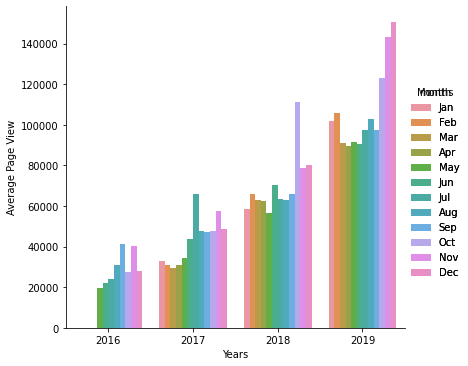

In [39]:
g = sns.catplot(
    x='year', y='value', data = df_group,
    kind = 'bar', hue='month'
)

g.set(xlabel = 'Years')
g.set(ylabel = 'Average Page View')
g.add_legend(title = 'Months') 

In [40]:
df.head()


,date,value,month,year
10,2016-05-19,19736,5,2016
17,2016-05-26,18060,5,2016
18,2016-05-27,19997,5,2016
19,2016-05-28,19044,5,2016
20,2016-05-29,20325,5,2016


<AxesSubplot:xlabel='month', ylabel='value'>

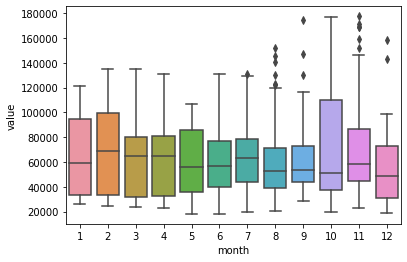

In [41]:
sns.boxplot(x="month", y="value", data=df)
 

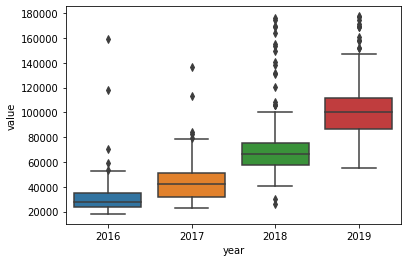

In [42]:
ax = sns.boxplot(x="year", y="value", data=df) 


In [43]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

Text(0.5, 1.0, 'Month-wise Box Plot(Seasonality)')

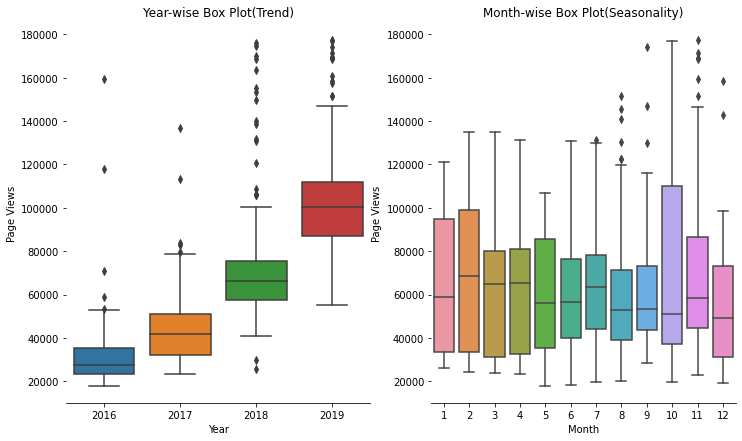

In [44]:
# Let's combine the boxplots

f, axes = plt.subplots(figsize=(12, 7), ncols=2, sharex=False)
sns.despine(left=True)

ax2 = sns.boxplot(x='year', y='value', data=df, ax=axes[0])
ax2.set_xlabel('Year')
ax2.set_ylabel('Page Views')
ax2.set_title('Year-wise Box Plot(Trend)')

ax2 = sns.boxplot(x='month', y='value', data=df, ax=axes[1])
ax2.set_xlabel('Month')
ax2.set_ylabel('Page Views')
ax2.set_title('Month-wise Box Plot(Seasonality)')

In [ ]:
# That's it! I hope you enjoyed it! 
